# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "city_data.csv"
ride_data_to_load = "ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [2]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [3]:
#  1. Get the total rides for each city type
urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]

urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]
suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]
rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]

print(urban_ride_count.sum())
print(suburban_ride_count.sum())
print(rural_ride_count.sum())



1625
625
125


In [4]:
# 2. Get the total drivers for each city type
urban_driver_count = urban_cities_df.groupby(["city"]).mean()["driver_count"]
suburban_driver_count = suburban_cities_df.groupby(["city"]).mean()["driver_count"]
rural_driver_count = rural_cities_df.groupby(["city"]).mean()["driver_count"]

print(urban_driver_count.sum())
print(suburban_driver_count.sum())
print(rural_driver_count.sum())


2405.0
490.0
78.0


In [5]:
#  3. Get the total amount of fares for each city type
urban_total_fare = urban_cities_df.groupby(["city"]).sum()["fare"]
suburban_total_fare = suburban_cities_df.groupby(["city"]).sum()["fare"]
rural_total_fare = rural_cities_df.groupby(["city"]).sum()["fare"]

print(urban_total_fare.sum())
print(suburban_total_fare.sum())
print(rural_total_fare.sum())



39854.38000000001
19356.33
4327.93


In [6]:
#  4. Get the average fare per ride for each city type. 
urban_avg_fare = (urban_total_fare.sum()) / (urban_ride_count.sum())
suburban_avg_fare = (suburban_total_fare.sum()) / (suburban_ride_count.sum())
rural_avg_fare = (rural_total_fare.sum()) / (rural_ride_count.sum())

print(urban_avg_fare)
print(suburban_avg_fare)
print(rural_avg_fare)


24.525772307692314
30.970128000000003
34.62344


In [7]:
# 5. Get the average fare per driver for each city type. 
urban_avg_fareperdriver = (urban_total_fare.sum()) / (urban_driver_count.sum())
suburban_avg_fareperdriver = (suburban_total_fare.sum()) / (suburban_driver_count.sum())
rural_avg_fareperdriver = (rural_total_fare.sum()) / (rural_driver_count.sum())

print(urban_avg_fareperdriver)
print(suburban_avg_fareperdriver)
print(rural_avg_fareperdriver)



16.57146777546778
39.50271428571429
55.48628205128205


In [8]:
#  6. Create a PyBer summary DataFrame. 
pyber_summary_df = pd.DataFrame({'type': ['Rural', 'Suburban', 'Urban'], 
                                    'Total Rides': [rural_ride_count.sum(), suburban_ride_count.sum(), urban_ride_count.sum()],'Total Drivers':[rural_driver_count.sum(), suburban_driver_count.sum(), urban_driver_count.sum()],'Total Fares': [rural_total_fare.sum(), suburban_total_fare.sum(), urban_total_fare.sum()],'Average Fares per Ride': [rural_avg_fare, suburban_avg_fare, urban_avg_fare],'Average Fares per Driver': [rural_avg_fareperdriver, suburban_avg_fareperdriver, urban_avg_fareperdriver]})



pyber_summary_df.set_index('type')
pyber_summary_df


,type,Total Rides,Total Drivers,Total Fares,Average Fares per Ride,Average Fares per Driver
0,Rural,125,78.0,4327.93,34.623440,55.486282
1,Suburban,625,490.0,19356.33,30.970128,39.502714
2,Urban,1625,2405.0,39854.38,24.525772,16.571468


In [9]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None


In [10]:
#  8. Format the columns.
pyber_summary_df['Total Rides'] = pyber_summary_df['Total Rides'].map("{:,}".format)
pyber_summary_df['Total Drivers'] = pyber_summary_df['Total Drivers'].map("{:,}".format)
pyber_summary_df['Total Fares'] = pyber_summary_df['Total Fares'].map("${:,.2f}".format)
pyber_summary_df['Average Fares per Ride'] = pyber_summary_df['Average Fares per Ride'].map("${:,.2f}".format)
pyber_summary_df['Average Fares per Driver'] = pyber_summary_df['Average Fares per Driver'].map("${:,.2f}".format)

pyber_summary_df

,type,Total Rides,Total Drivers,Total Fares,Average Fares per Ride,Average Fares per Driver
0,Rural,125,78.0,"$4,327.93",$34.62,$55.49
1,Suburban,625,490.0,"$19,356.33",$30.97,$39.50
2,Urban,"1,625","2,405.0","$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [11]:
# 9. Using groupby() on the pyber_data_df to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
date_of_fares = pyber_data_df.groupby(["type","date"]).sum()["fare"]
date_of_fares

type   date               
Rural  2019-01-01 09:45:36    43.69
       2019-01-02 11:18:32    52.12
       2019-01-03 19:51:01    19.90
       2019-01-04 03:31:26    24.88
       2019-01-06 07:38:40    47.33
                              ...  
Urban  2019-05-08 04:20:00    21.99
       2019-05-08 04:39:49    18.45
       2019-05-08 07:29:01    18.55
       2019-05-08 11:38:35    19.77
       2019-05-08 13:10:18    18.04
Name: fare, Length: 2375, dtype: float64

In [76]:
# 10. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()
date_of_fares = date_of_fares.reset_index()

In [78]:
# 11. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
table = pd.pivot_table(date_of_fares, values = ["fare"], index=['date'], columns = ["type"], aggfunc=np.sum)

table

fare                
type                Rural Suburban  Urban
date                                     
2019-01-01 00:08:16   NaN      NaN  37.91
2019-01-01 00:46:46   NaN    47.74    NaN
2019-01-01 02:07:24   NaN    24.07    NaN
2019-01-01 03:46:50   NaN      NaN   7.57
2019-01-01 05:23:21   NaN      NaN  10.75
...                   ...      ...    ...
2019-05-08 04:20:00   NaN      NaN  21.99
2019-05-08 04:39:49   NaN      NaN  18.45
2019-05-08 07:29:01   NaN      NaN  18.55
2019-05-08 11:38:35   NaN      NaN  19.77
2019-05-08 13:10:18   NaN      NaN  18.04

[2375 rows x 3 columns]

In [14]:
# 12. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2018-01-01':'2018-04-29'.
new_table = table.loc['2019-01-01':'2019-04-29']
new_table

fare                
type                Rural Suburban  Urban
date                                     
2019-01-01 00:08:16   NaN      NaN  37.91
2019-01-01 00:46:46   NaN    47.74    NaN
2019-01-01 02:07:24   NaN    24.07    NaN
2019-01-01 03:46:50   NaN      NaN   7.57
2019-01-01 05:23:21   NaN      NaN  10.75
...                   ...      ...    ...
2019-04-28 14:28:36   NaN      NaN  11.46
2019-04-28 16:29:16   NaN      NaN  36.42
2019-04-28 17:26:52   NaN      NaN  31.43
2019-04-28 17:38:09   NaN    34.87    NaN
2019-04-28 19:35:03   NaN    16.96    NaN

[2196 rows x 3 columns]

In [15]:
# 13. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)
new_table.index = pd.to_datetime(new_table.index)


In [16]:
# 14. Check that the datatype for the index is datetime using df.info()
new_table.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2196 entries, 2019-01-01 00:08:16 to 2019-04-28 19:35:03
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   (fare, Rural)     114 non-null    float64
 1   (fare, Suburban)  573 non-null    float64
 2   (fare, Urban)     1509 non-null   float64
dtypes: float64(3)
memory usage: 68.6 KB


In [67]:
# 15. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
new_table_week = new_table.resample('W').sum()
new_table_week.head()

fare                  
type         Rural Suburban    Urban
date                                
2019-01-06  187.92   721.60  1661.68
2019-01-13   67.65  1105.13  2050.43
2019-01-20  306.00  1218.20  1939.02
2019-01-27  179.69  1203.28  2129.51
2019-02-03  333.08  1042.79  2086.94

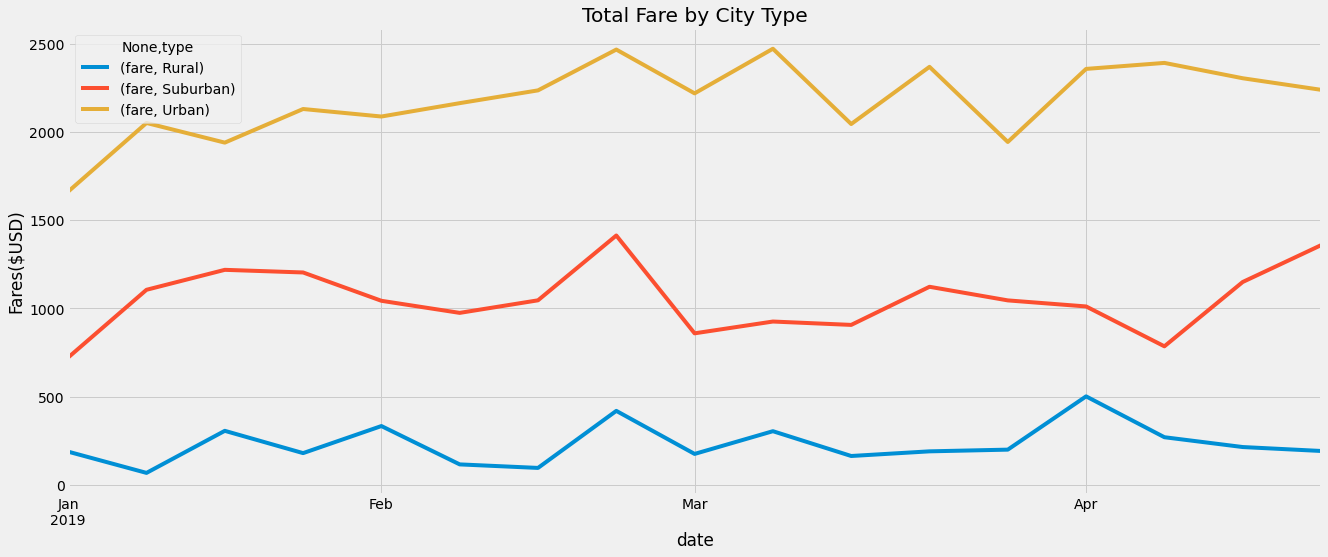

In [73]:
# 16. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 
# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')
new_table_week.plot(title='Total Fare by City Type', figsize =(20,8))
plt.ylabel('Fares($USD)');
